In [1]:
import pandas as pd
import numpy as np

In [2]:
location_counts_df = pd.read_excel('./pandas/5_Jeju_Hotplace/files/3_location_counts.xlsx')
location_counts_df.head()
location_counts_df.columns

Index(['Unnamed: 0', 'place'], dtype='object')

In [3]:
locations = list(location_counts_df.loc[:, 'Unnamed: 0'])
# type(locations)

locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '할로비치',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '고집돌우럭중문점',
 '석부작박물관',
 '제주도 애월읍',
 '알뜨르 비행장',
 '카멜리아 힐',
 '제주레포츠랜드',
 '제주 함덕 서우봉 해변',
 '밥깡패',
 '위미동백나무군락지',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '제주신화월드 Jeju Shinhwa World',
 '협재해변 Beach',
 'Woljeongri Beach',
 '연동 바오젠 거리',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '고래배꼽',
 '제주 성산 신산포구자연산횟집 회포장',
 '새별오름',
 '용눈이오름',
 '용머리해안',
 '제주빅볼랜드',
 '사려니숲길',
 '하이엔드 제주',
 '캔디원',
 '삼무공원',
 '서귀포 느영나영 게스트하우스',
 '위미2리 동백군락지',
 'Jeju Island 제주특별자치도 济州道',
 '제주어린왕자게스트하우스',
 '제주커피박물관 Baum',
 '위미동백나무군락',
 '한라산',
 '마마뜰',
 'Jeju Aewol',
 '휴애리 자연생활공원',
 '옹포리',
 '광치기해변',
 '서우봉',
 '제주해남',
 '한라산 (漢拏山, Hallasan)',
 '카페한라산',
 '제주 송악산',
 '성이시돌목장',
 '월정리카페콧수염',
 '옹포별장가든',
 '곽지해수욕장',
 '牛岛 Udo Island 우도',
 '아줄레주',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 '카페브리프',
 '에코랜드',
 '산굼부리',
 '소세지가게',
 '우아당',
 

In [4]:
import requests

In [5]:
searching = '합정 스타벅스'
url = 'http://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)

url

'http://dapi.kakao.com/v2/local/search/keyword.json?query=합정 스타벅스'

In [6]:
headers = {
    "Authorization" : "KakaoAK 7a3af3adf3096046f94ddc76d9ef8866"
}

In [7]:
places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 마포구 서교동 395-166',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '26572121',
  'phone': '1522-3232',
  'place_name': '스타벅스 서교점',
  'place_url': 'http://place.map.kakao.com/26572121',
  'road_address_name': '서울 마포구 양화로 78',
  'x': '126.916980454434',
  'y': '37.5514601750423'},
 {'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91253700818196',
  'y': '37.54994959743763'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '1522-3232',
  'place_n

In [8]:
def find_places(searching):
    url = 'http://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {
    "Authorization": "KakaoAK 7a3af3adf3096046f94ddc76d9ef8866"
    }
    places = requests.get(url, headers = headers).json()['documents']
    
    place = places[0]
    
    name = place['place_name']
    x = place['x']
    y = place['y']
    
    data = [name, x, y, searching]
    
    return(data)

In [9]:
data = find_places('제주공항')
data

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

In [10]:
from tqdm.notebook import tqdm

In [11]:
# locations_inform = []

# for location in tqdm(locations[:20]):
#     try:
#         data = find_places(location)
#         locations_inform.append(data)
#         time.sleep(2)
#     except:
#         pass
    
# locations_inform


locations_inform = []

for location in tqdm(locations[:20]):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(1)
    except:
        pass
    
locations_inform

  0%|          | 0/20 [00:00<?, ?it/s]

[['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['서귀포잠수함', '126.558616052674', '33.2393033784206', 'Seogwipo'],
 ['바이나흐튼 크리스마스박물관', '126.32785786016811', '33.2915720831759', '제주도 크리스마스 박물관'],
 ['할로비치 본점', '126.2815248933638', '33.30832616522123', '할로비치'],
 ['제주에인감귤밭', '126.5390139270361', '33.25656069063887', '제주에인감귤밭'],
 ['제주도', '126.54587355630036', '33.379777816446165', 'Jeju Island'],
 ['한라산1100고지', '126.462219691112', '33.3580781709788', '1100고지'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['고집돌우럭 중문점', '126.416704762779', '33.2579811121134', '고집돌우럭중문점'],
 ['석부작박물관', '126.536501983154', '33.2504031491774', '석부작박물관'],
 ['올레길 16코스(고내-광령 올레)', '126.38979561557086', '33.46649759191228', '제주도 애월읍'],
 ['알뜨르비행장', '126.271527320164', '33.2047161778831', '알뜨르 비행장'],
 ['카멜리아힐', '126.370009467525', '33.2896344311608', '카멜리아 힐'],
 ['제주레포츠랜드', '126.6387551242765', '33.48206819907232', '제주레포츠랜드'],
 ['함덕해수욕장', '126.669238934013', '33.5430615661113', '제주 

In [12]:
location_counts_df = pd.read_excel('./pandas/5_Jeju_Hotplace/files/3_location_counts.xlsx', index_col = 0)
location_inform_df = pd.read_excel('./pandas/5_Jeju_Hotplace/files/3_locations.xlsx')

In [13]:
location_data = pd.merge(location_inform_df,
                        location_counts_df, how = 'inner',
                        left_on = 'name_official',
                        right_index = True)

location_data.head()

,name_official,경도,위도,인스타위치명,place
1,서귀포잠수함,126.558616,33.239303,Seogwipo,1
308,서귀포잠수함,126.558616,33.239303,서귀포잠수함,1
3,할로비치,127.020826,37.518211,할로비치,51
4,제주에인감귤밭,126.539410,33.256610,제주에인감귤밭,48
5,제주도,126.545876,33.379777,Jeju Island,4


In [14]:
location_data = location_data.pivot_table(values = 'place',
                             index = ['name_official', '경도', '위도'],
                             aggfunc = 'sum')

location_data.sort_values('place', ascending=False)

,,,place
name_official,경도,위도,
할로비치,127.020826,37.518211,51
제주에인감귤밭,126.539410,33.256610,48
석부작박물관,126.536502,33.250403,36
위미동백나무군락,126.674731,33.272939,18
밥깡패,126.263436,33.410093,16
...,...,...,...
산방산,126.313425,33.241304,1
사이카레,126.381107,33.484245,1
사락,126.307741,33.228771,1


In [15]:
import folium

In [16]:
latitude = 37.394946
longitude = 127.111104

m = folium.Map(location = [latitude, longitude],
              width = 700,
              hight = 300,
              zoom_start = 15)

folium.Marker(location = [latitude, longitude],
             popup = '<iframe width="703" height="395" src="https://www.youtube.com/embed/h8V3bm8ioGM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>',
             tooltip = '선릉역 멀티캠퍼스',
             icon = folium.Icon(color = 'red',
                               icon_color = 'white',
                                icon = 'wifi',
                               prefix = 'fa')).add_to(m)  #fontawesome


folium.CircleMarker(location = [latitude, longitude],
                   color = 'tomato',
                   radius = 50,
                   tooltip = '활동반경',
                    ).add_to(m)

m

In [28]:
location_data = pd.read_excel('./pandas/5_Jeju_Hotplace/files/3_location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name_official  416 non-null    object 
 1   경도             417 non-null    float64
 2   위도             417 non-null    float64
 3   place          417 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.2+ KB


In [32]:
Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla,
                     zoom_start = 10)
folium.TileLayer().add_to(map_jeju)  #https://deparkes.co.uk/2016/06/10/folium-map-tiles/

for i in range(len(location_data)):
    name = location_data['name_official'][i]
    count = location_data['place'][i]
    size = int(count*2)
    lng = location_data['경도'][i]
    lat = location_data['위도'][i]
    folium.CircleMarker(location = [lat, lng],
                       radius = size,
                       color = 'red',
                       popup = name).add_to(map_jeju)

    
map_jeju

In [18]:
import wordcloud

In [19]:
raw_total = pd.read_excel('./pandas/5_Jeju_Hotplace/files/1_crawling_raw.xlsx')
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [20]:
raw_total['tags'][0]

"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이']"

In [21]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tags in tags_list:
        tags_total.append(tags)
        
tags_total

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이',
 '#제주핫플',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도맛집',
 '#제주맛집',
 '#여행',
 '#제주맛집추천',
 '#맛집추천',
 '#제주공항',
 '#제주카페',
 '#제주디저트맛집',
 '#제주데이트',
 '#제주데이트코스',
 '#제주도여행',
 '#고집돌우럭',
 '#중문맛집',
 '#제주여행중',
 '#감귤카페',
 '#제주카페추천',
 '#제주야시장',
 '#맛집',
 '#제주갈만한곳',
 '#제주관광',
 '#좋아요반사',
 '#좋반',
 '#제주도여행지',
 '#제주도가볼만한곳',
 '#제주여행코스',
 '#honestin',
 '#어니스틴',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도여행',
 '#제주살이',
 '#제주도민',
 '#제주가볼만한곳',
 '#제주일상',
 '#제주도가볼만한곳',
 '#제주핫플레이스',
 '#제주핫플',
 '#제주라이프',
 '#가을제주',
 '#제주시',
 '#제주여행코스',
 '#제주도핫플',
 '#제주오름',
 '#들렁모루',
 '#비밀의정원',
 '#삼굼부리',
 '#정물오름',
 '#자연생태마을',
 '#오조포구',
 '#올레길',
 '#제주하늘',
 '#제주관광',
 '#11월여행',
 '#제주관광',
 '#제주살이',
 '#제주이주민',
 '#아라동주민',
 '#삼남매집',
 '#새해첫날',
 '#드라이브',
 '#명월국민학교',
 '#낙서',
 '#잡히면죽는다',
 '#제주관광',
 '#제주',
 '#돔나이트',

In [24]:
from collections import Counter
tag_counts_selected = Counter(tags_total)

tag_counts_selected

Counter({'#제주핫플레이스': 848,
         '#제주여행': 3204,
         '#제주도여행': 1555,
         '#제주가볼만한곳': 580,
         '#제주도핫플': 186,
         '#제주여행코스': 98,
         '#제주공항': 308,
         '#제주도맛집': 3467,
         '#제주맛집': 3750,
         '#제주스냅': 146,
         '#제주풍경': 54,
         '#제주사진': 15,
         '#제주카페': 711,
         '#제주도카페': 354,
         '#산굼부리': 39,
         '#제주도바다': 34,
         '#귤체험': 7,
         '#우도': 83,
         '#제주관광': 2898,
         '#제주도여향지': 1,
         '#제주여행중': 41,
         '#삼육오빠': 1,
         '#제주앓이': 42,
         '#제주핫플': 530,
         '#제주': 1567,
         '#제주도': 2096,
         '#여행': 455,
         '#제주맛집추천': 728,
         '#맛집추천': 44,
         '#제주디저트맛집': 2,
         '#제주데이트': 55,
         '#제주데이트코스': 114,
         '#고집돌우럭': 53,
         '#중문맛집': 472,
         '#감귤카페': 9,
         '#제주카페추천': 169,
         '#제주야시장': 78,
         '#맛집': 223,
         '#제주갈만한곳': 143,
         '#좋아요반사': 58,
         '#좋반': 31,
         '#제주도여행지': 146,
         '#제주도가볼만한곳': 1047,
 

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import platform

In [26]:
font_path = 'c://Windows/Fonts/malgun.ttf'

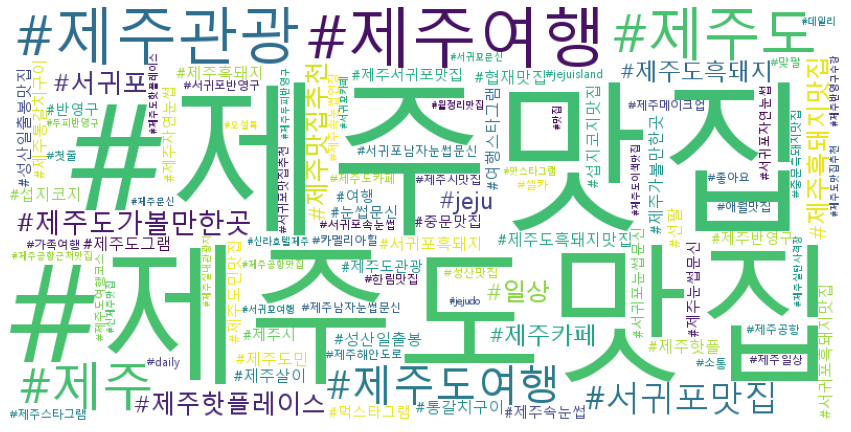

In [27]:
wordcloud = WordCloud(font_path = font_path,
            background_color = 'white',
            max_words = 100,
            width = 800,
            height = 400,
            relative_scaling = 0.3,
            ).generate_from_frequencies(tag_counts_selected)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()